In [146]:
from numpy import loadtxt
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd
import time
import json
import os 
import shap

import matplotlib.pyplot as plt 

os.chdir('/Users/adrianharris/Desktop/Messy-Data-Project')

path = os.getcwd()


In [147]:
dataset = pd.read_csv('Data/feature_eng_above_5_99s_data.csv')

In [148]:
df = dataset.drop("player", axis=1)

df.head()


,level_overall,level_atk,level_def,level_str,level_constiution,level_range,level_prayer,level_magic,level_cooking,level_wood_cutting,...,total_xp_overall,cluster,Basic_member_pure,Obby_Mauler_Pure,Black_Pure,Turmoil_Proselyte_Pure,Barrows_Pure,Anti_Pure,Summoning_Tank_Defence,Skiller_Pure
0,2898,99,99,99,99,99,99,99,99,99,...,4537236260,1,0,0,0,0,0,0,0,0
1,2898,99,99,99,99,99,99,99,99,99,...,5600000000,1,0,0,0,0,0,0,0,0
2,2898,99,99,99,99,99,99,99,99,99,...,3347652512,2,0,0,0,0,0,0,0,0
3,2898,99,99,99,99,99,99,99,99,99,...,5600000000,1,0,0,0,0,0,0,0,0
4,2898,99,99,99,99,99,99,99,99,99,...,5600000000,1,0,0,0,0,0,0,0,0


In [139]:
# split data into X and y


X = df.loc[:, ~df.columns.isin(['total_xp_overall', 'level_overall'])]
Y = df.loc[:, 'total_xp_overall']

# Training and Testing data
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [130]:
# Linear regression

model = LinearRegression()
model.fit(X, Y)

r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

coefficient of determination: 0.7320692686475014
intercept: -299480682.45509267
slope: [ 7.54902882e+04  4.58690507e+05  6.64026454e+05 -2.89192554e+06
 -1.81798268e+05  1.29529883e+05  1.28043564e+06  3.42523568e+05
 -3.60497122e+05 -8.02756512e+04  1.23354465e+04 -1.09624631e+05
  1.56224481e+06 -4.62020138e+04  6.26007494e+05 -2.05817135e+05
 -9.28164296e+05  2.10315386e+04  3.08158770e+06  5.02324342e+05
  2.59165592e+05 -1.10025103e+05 -1.09311689e+06 -9.27077326e+05
  2.91924252e+06 -3.69342293e+05  8.40245155e+05 -5.56525070e+05
  2.65878712e+07 -1.95805004e+07 -2.83451222e+08 -8.88574868e-06
  1.78813934e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.12520841e+08  1.03442693e+07  3.34480493e+08]


In [141]:
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [142]:
y_pred = xgbr.predict(X_test)
score = xgbr.score(X_train, y_train) 
score

0.7989579451282882

In [143]:
scores = cross_val_score(xgbr,X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.76


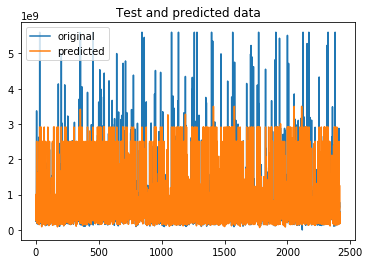

In [149]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


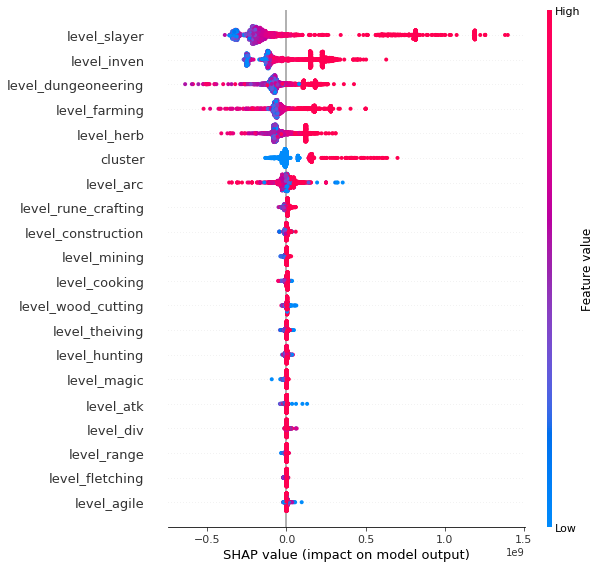

In [145]:
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(X_test)
plot = shap.summary_plot(shap_values,X_test)

In [183]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler 

from scipy import stats

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout

In [184]:

nn_x_train = np.array(X_train)
nn_x_test = np.array(X_test)

nn_y_train = np.array(y_train)
nn_y_test = np.array(y_test)

In [185]:
model = Sequential()
model.add(Dense(20, input_dim = len(nn_x_train[0,:]), activation = 'relu')) 
model.add(Dense(10, activation =  'gelu' ))
model.add(Dense(10, activation =  'gelu' ))
model.add(Dropout(0.8))
model.add(Dense(8, activation =  'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [186]:
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

In [187]:
history = model.fit(x = nn_x_train, y = nn_y_train , validation_split=0.2, epochs = 10, verbose = 1)

Epoch 1/10
123/123 [==============================] - 1s 2ms/step - loss: 1521703710866859776.0000 - accuracy: 0.0000e+00 - val_loss: 1422309412554407936.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
123/123 [==============================] - 0s 1ms/step - loss: 1590531092698636544.0000 - accuracy: 0.0000e+00 - val_loss: 1422309412554407936.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
123/123 [==============================] - 0s 975us/step - loss: 1545553251390498048.0000 - accuracy: 0.0000e+00 - val_loss: 1422309412554407936.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
123/123 [==============================] - 0s 984us/step - loss: 1614172622691330816.0000 - accuracy: 0.0000e+00 - val_loss: 1422309412554407936.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
123/123 [==============================] - 0s 1ms/step - loss: 1662560311134565888.0000 - accuracy: 0.0000e+00 - val_loss: 1422309412554407936.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
123/123 [==============================] - 0s 1ms/step 

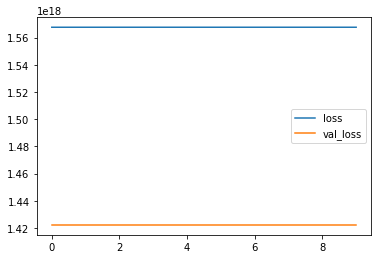

In [188]:
# Training loss 

plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend();

In [190]:
score = model.evaluate(nn_x_train, nn_y_train, batch_size=2048)
print(score)

3/3 [==============================] - 0s 2ms/step - loss: 1538493156994056192.0000 - accuracy: 0.0000e+00
[1.5384931569940562e+18, 0.0]
